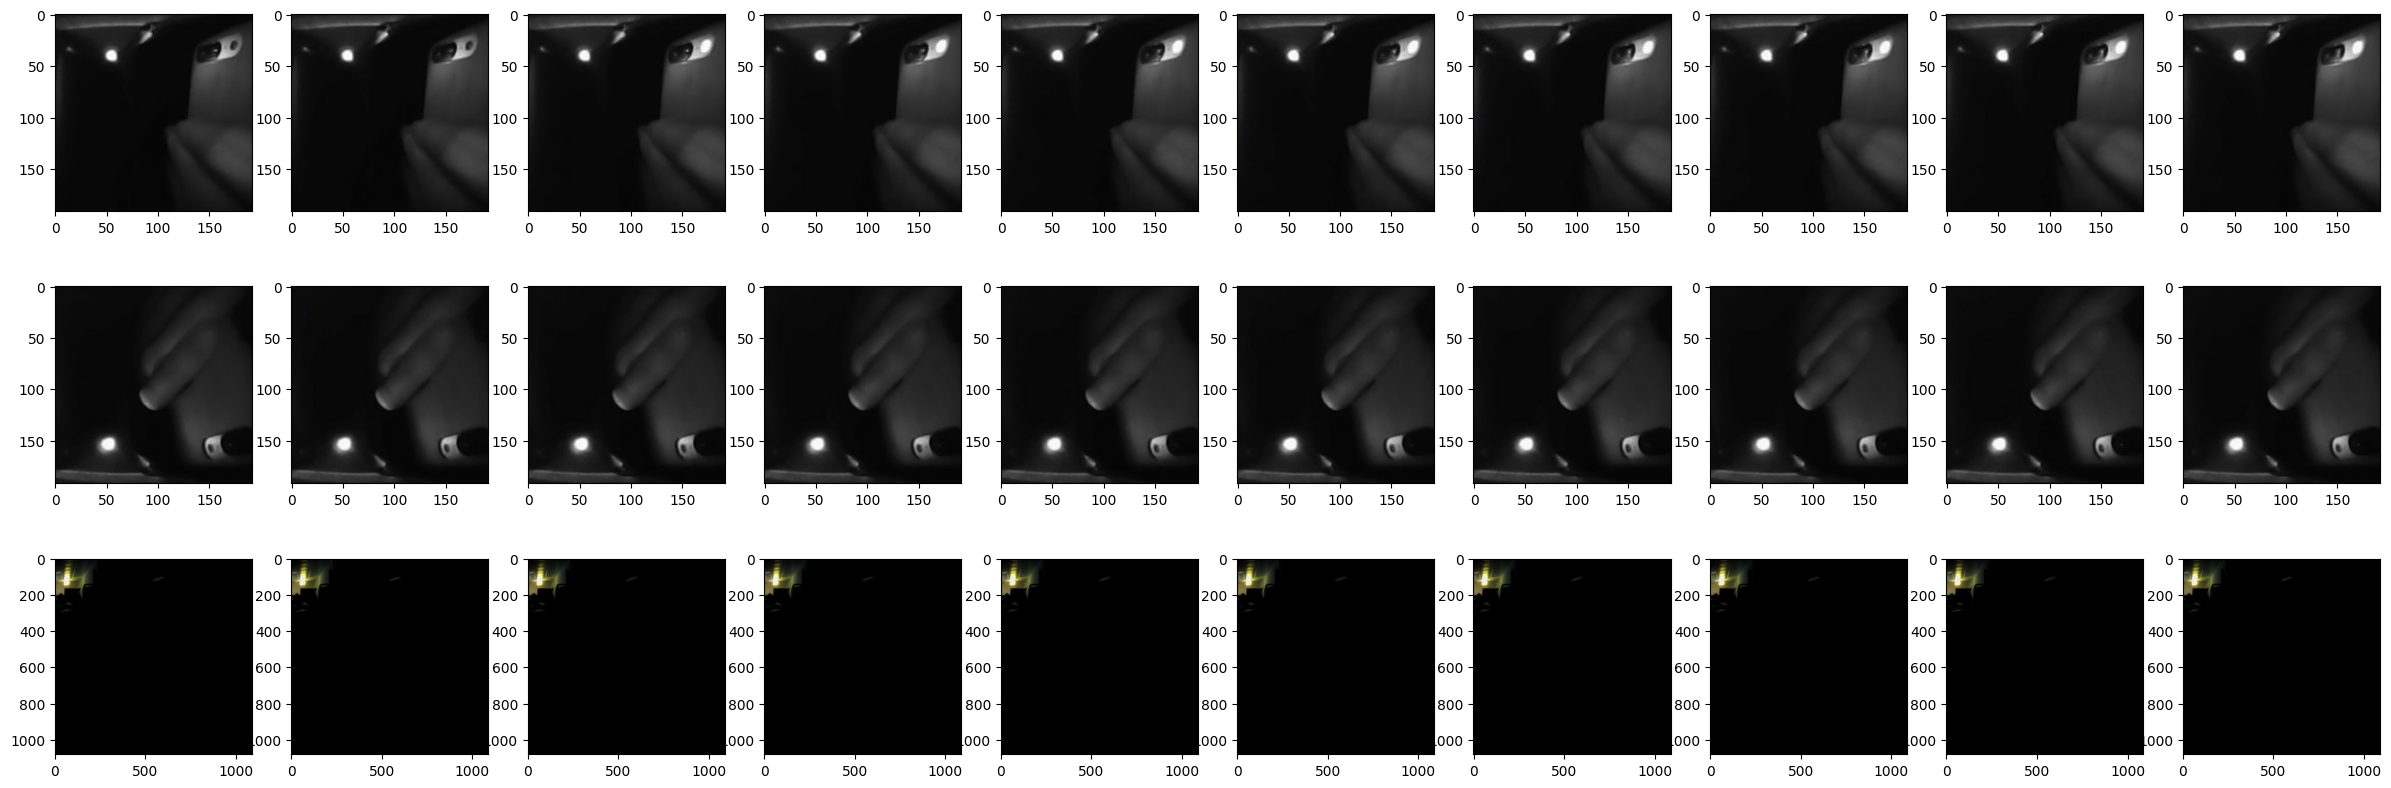

In [20]:
from matplotlib import pyplot as plt
from constants import *
import pandas as pd
import cv2
import numpy as np
import os
# recording: 9480f94c-6052-4d26-86b7-f2383bf34de3
#plot 3 images in a row from each camera, using the gaze with frames and events csv file and take the pictures from the frames folder respectively

#return 3 images from the gaze index
def plot_images_from_gaze(recording_id, gaze_index=3000):
    recording_folder = "recordings/" + recording_id + "/"
    gaze_df = pd.read_csv(recording_folder + "gaze_with_frames_and_events.csv")
    #get indices of the gaze line
    left_eye_frame = gaze_df['left_eye_frame'][gaze_index]
    right_eye_frame = gaze_df['right_eye_frame'][gaze_index]
    world_frame = gaze_df['world_frame'][gaze_index]

    #get the images from the frames folder
    left_eye_image = cv2.imread(recording_folder + camera_folders[0]  + '/' + str(left_eye_frame) + ".png")
    right_eye_image = cv2.imread(recording_folder + camera_folders[1]  + '/' + str(right_eye_frame) + ".png")
    world_image = cv2.imread(recording_folder + camera_folders[2]  + '/' + str(world_frame) + ".png")

    return left_eye_image, right_eye_image, world_image

def plot_10_images_from_gaze(recording_id, first_gaze_index=3000):
    fig, axs = plt.subplots(3, 10, figsize=(30, 10))
    for i in range(10):
        left_eye_image, right_eye_image, world_image = plot_images_from_gaze(recording_id, first_gaze_index + i)
        axs[0, i].imshow(left_eye_image)
        axs[1, i].imshow(right_eye_image)
        axs[2, i].imshow(world_image)
    plt.show()
        
    
plot_10_images_from_gaze("82e52db9-1cac-495d-99dd-bebb51c393a0", 3956)

In [33]:
#read 82e52db9-1cac-495d-99dd-bebb51c393a0\PI left v1_sae_log_1.bin.bin
from constants import *
import numpy as np
def read_camera_logs(recording_id):
    recording_folder = "recordings/" + recording_id + "/"
    camera_logs = []
    camera_names = ["PI left v1", "PI right v1", "PI world v1"]
    for camera in camera_names[:2]:
        camera_logs.append(np.fromfile(recording_folder + camera + "_sae_log_1.bin.bin", dtype=np.uint8))
    return camera_logs

In [34]:
camera_logs = read_camera_logs("82e52db9-1cac-495d-99dd-bebb51c393a0")

In [41]:
len(camera_logs[1])

192

In [46]:
recording_folder = "recordings/" + "82e52db9-1cac-495d-99dd-bebb51c393a0" + "/"
len(np.fromfile(recording_folder + "calibration.bin", dtype=np.uint64))
np.fromfile(recording_folder + "calibration.bin", dtype=np.uint64)

array([ 5503998474056055160,         277159069252, 16360061219702308864,
               277047189628,  5864211181882834944,  6575301912608111386,
               277041937714,                    0,                    0,
       11062634262896312320,  1699596210965519424,  4024043506566495418,
       10749694558778992534,  1952399770596064017, 11167107657175001869,
       14770177575516327065,  3467625750809276763, 13287028748193843626,
        6250686495118645182, 12668101558070677875, 11852219400320433397,
        8428208249750294982,  4405283771247107811, 14854664047033531818,
        7623231048324170091, 18131729866424325852], dtype=uint64)